# [Kaggle competition loan approval prediction](https://www.kaggle.com/competitions/playground-series-s4e10/data)


In [2]:
path = "../dataset/train.csv"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(path)
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [5]:
df.shape

(58645, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [7]:
df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [10]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64

In [11]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [12]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64

In [13]:
df['loan_grade'].value_counts()

loan_grade
A    20984
B    20400
C    11036
D     5034
E     1009
F      149
G       33
Name: count, dtype: int64

In [14]:
df['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    49943
Y     8702
Name: count, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['person_home_ownership'] = le.fit_transform(df['person_home_ownership'])

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [17]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [18]:
# find index of column
# df.columns.get_loc('loan_intent')
cols = df.columns
cols = cols.drop(['loan_status','id'])
print(cols)
for col in ['loan_intent', 'person_home_ownership', 'loan_grade', 'cb_person_default_on_file']:
    print(cols.get_loc(col),end=", ")

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')
4, 2, 5, 9, 

In [19]:
# # ['id', 'person_age', 'person_income', 'person_home_ownership',
# #        'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
# #        'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
# #        'cb_person_cred_hist_length', 'loan_status'],
# encoder = ColumnTransformer(
#     transformers=[
#         # ('label', OrdinalEncoder(), ['loan_intent', 'person_home_ownership', 'loan_grade', 'cb_person_default_on_file']),
#         # ('scaler', StandardScaler(), ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'])
#         ('label', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), [4, 2, 5, 9]),
#         ('scaler', StandardScaler(), [0, 1, 3, 6, 7, 8, 10])
#     ], remainder='passthrough'
# )

# encoder = ColumnTransformer(
#     transformers=[
#         ('label', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), 
#          [5, 3, 6, 10]),  # Categorical columns
#         ('scaler', StandardScaler(), 
#          [1, 2, 4, 7, 8, 9, 11])  # Numerical columns
#     ], remainder='passthrough'
# )

from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'),[4, 2, 9]),
        ('label', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), 
         [5]),  # Adjusted indices after dropping 'id'
        ('scaler', StandardScaler(), 
         [0, 1, 3, 6, 7, 8, 10])  # Adjusted indices after dropping 'id'
    ], remainder='passthrough'
)


In [23]:
from sklearn.model_selection import train_test_split
X = df.drop(['id','loan_status'], axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
encoder.fit(X_train)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)


In [26]:
# import multiple models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def fit_and_score(model,name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # score = model.score(X_test, y_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f'{name} model')
    print(f'Accuracy: {acc}')
    print(f'Precision: {prec}')
    print(f'Recall: {rec}')
    print(f'F1 Score: {f1}')
    print('\n')



In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name}:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print()

RandomForestClassifier:
Accuracy: 0.9522550942109301
Precision: 0.921996879875195
Recall: 0.7198538367844093
F1 Score: 0.8084815321477428

LogisticRegression:
Accuracy: 0.9034870832978088
Precision: 0.7555110220440882
Recall: 0.4591961023142509
F1 Score: 0.5712121212121212

SVC:
Accuracy: 0.9444965470202064
Precision: 0.9091659785301404
Recall: 0.6705237515225335
F1 Score: 0.7718191377497371

KNeighborsClassifier:
Accuracy: 0.9340949782590161
Precision: 0.8429360694554064
Recall: 0.6504263093788063
F1 Score: 0.7342729460295634

DecisionTreeClassifier:
Accuracy: 0.9128655469349476
Precision: 0.6753393665158371
Recall: 0.7271619975639464
F1 Score: 0.7002932551319648



In [30]:
from xgboost import XGBClassifier

xg = XGBClassifier()
rf = RandomForestClassifier()
fit_and_score(xg, 'XGBClassifier', X_train, X_test, y_train, y_test)
fit_and_score(rf, 'RandomForestClassifier', X_train, X_test, y_train, y_test)

XGBClassifier model
Accuracy: 0.9524256117316054
Precision: 0.8967789165446559
Recall: 0.7460414129110841
F1 Score: 0.8144946808510638


RandomForestClassifier model
Accuracy: 0.952766646772956
Precision: 0.922360248447205
Recall: 0.7235079171741778
F1 Score: 0.8109215017064847




In [177]:
# save the model
import pickle

def save_model(model, filename):
    dir = "../models/"
    with open(dir+filename+"_loan_pred.pkl", 'wb') as file:
        pickle.dump(model, file)

def load_model(path):
    dir = "../models/"
    with open(dir+path, 'rb') as file:
        return pickle.load(file)

In [178]:
save_model(rf, 'rf')
save_model(xg, 'xg')

In [179]:
dir = "../models/"
rf = load_model(dir+'rf_loan_pred.pkl')

In [180]:
fit_and_score(rf, 'RandomForestClassifier', X_train, X_test, y_train, y_test)

RandomForestClassifier model
Accuracy: 0.9497825901611391
Precision: 0.920863309352518
Recall: 0.7015834348355664
F1 Score: 0.7964051157967508




In [181]:
pickle.dump(encoder, open(dir+'encoder.pkl', 'wb'))

In [211]:
dataset_path = '../dataset/test.csv'
tf = pd.read_csv(dataset_path)

In [212]:
X = tf.drop(['id'], axis=1)

In [213]:
d = encoder.transform(X)

ValueError: columns are missing: {'id'}

In [192]:
d[:,1]

array([-1., -1., -1., ..., -1., -1., -1.])

In [185]:
cols = ['loan_intent', 'person_home_ownership', 'loan_grade', 'cb_person_default_on_file']

for col in cols:
    # print(col,df[col].unique().sort_values(),"|",tf[col].unique().sort_values(),df[col].unique().sort_values() == tf[col].unique().sort_values())
    print(df[col].unique().sort() == tf[col].unique().sort())

True
True
True
True


In [186]:
df.drop('loan_status',axis=1).columns == tf.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [207]:
a = tf.drop('id',axis=1).iloc[0]
a

person_age                                 23
person_income                           69000
person_home_ownership                    RENT
person_emp_length                         3.0
loan_intent                   HOMEIMPROVEMENT
loan_grade                                  F
loan_amnt                               25000
loan_int_rate                           15.76
loan_percent_income                      0.36
cb_person_default_on_file                   N
cb_person_cred_hist_length                  2
Name: 0, dtype: object

In [208]:
encoder.transform([a])

NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [189]:
cols = df.columns
cols = cols.drop(['loan_status','id'])
cols2 = tf.columns
cols2 = cols2.drop(['id'])
print(cols)
print(cols2)
for col in ['loan_intent', 'person_home_ownership', 'loan_grade', 'cb_person_default_on_file']:
    # print(cols.get_loc(col),end=", ")
    print(cols2.get_loc(col),"|", cols.get_loc(col))


Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')
Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')
4 | 4
2 | 2
5 | 5
9 | 9


<BarContainer object of 2 artists>

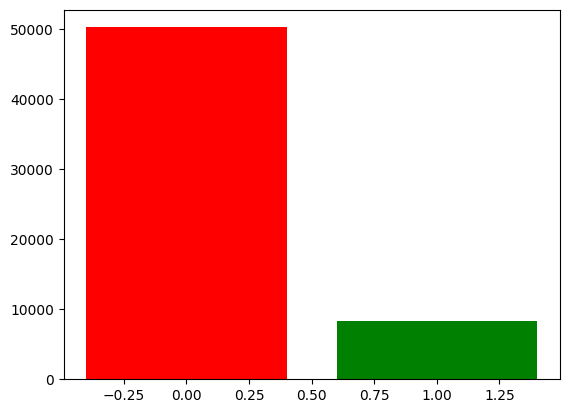

In [37]:
# df['loan_status'].plot()
plt.bar(df['loan_status'].unique(), df['loan_status'].value_counts(), color=['red', 'green'])

In [38]:
df['loan_status'].value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64